In [ ]:
# Import Common Packages for Classification and Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import Classification Packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Import robust scaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Import Spearman Correlation
from scipy.stats import spearmanr

### Analysis


In [2]:
train = pd.read_csv('train.csv')

new_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
new_data = new_data.drop(['EmployeeNumber'], axis=1)
new_data['Attrition'] = new_data['Attrition'].map({'Yes':1, 'No':0})

train = train.append(new_data)

y = train['Attrition']

train = train.drop(['id','Attrition'], axis=1)

test = pd.read_csv('test.csv') 

test = test.drop(['id'], axis=1)

train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,2,80,1,10,2,3,10,0,7,8
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,4,80,1,4,3,3,4,2,0,3
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,...,4,80,2,4,3,3,3,2,1,2
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,...,3,80,0,15,1,1,6,0,0,2
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,...,3,80,0,31,0,3,31,14,4,10


In [3]:
new_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
train = train.drop(['EmployeeCount','Over18','StandardHours'], axis=1)

test = test.drop(['EmployeeCount','Over18','StandardHours'], axis=1)

In [5]:
# Do basic data analysis
print('The shape of train data is: ',train.shape)
print('The shape of test data is: ',test.shape)
print('The columns of train data are: ',train.columns)

The shape of train data is:  (3147, 30)
The shape of test data is:  (1119, 30)
The columns of train data are:  Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [6]:
# In the end this kind of sucked a bit because it did not work to separate categorical and numerical data

qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']

print('The qualitative columns are: ',qualitative)
print('The quantitative columns are: ',quantitative)


The qualitative columns are:  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
The quantitative columns are:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


<AxesSubplot: >

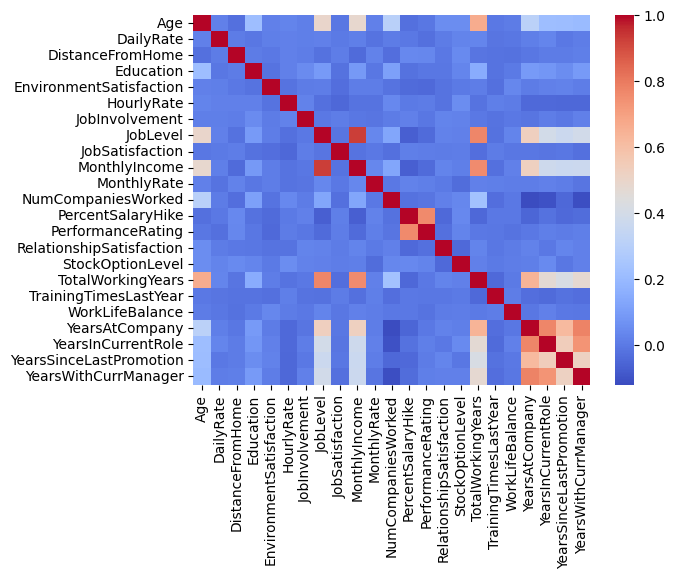

In [7]:
sns.heatmap(train.corr(), fmt='.2f', cmap='coolwarm')

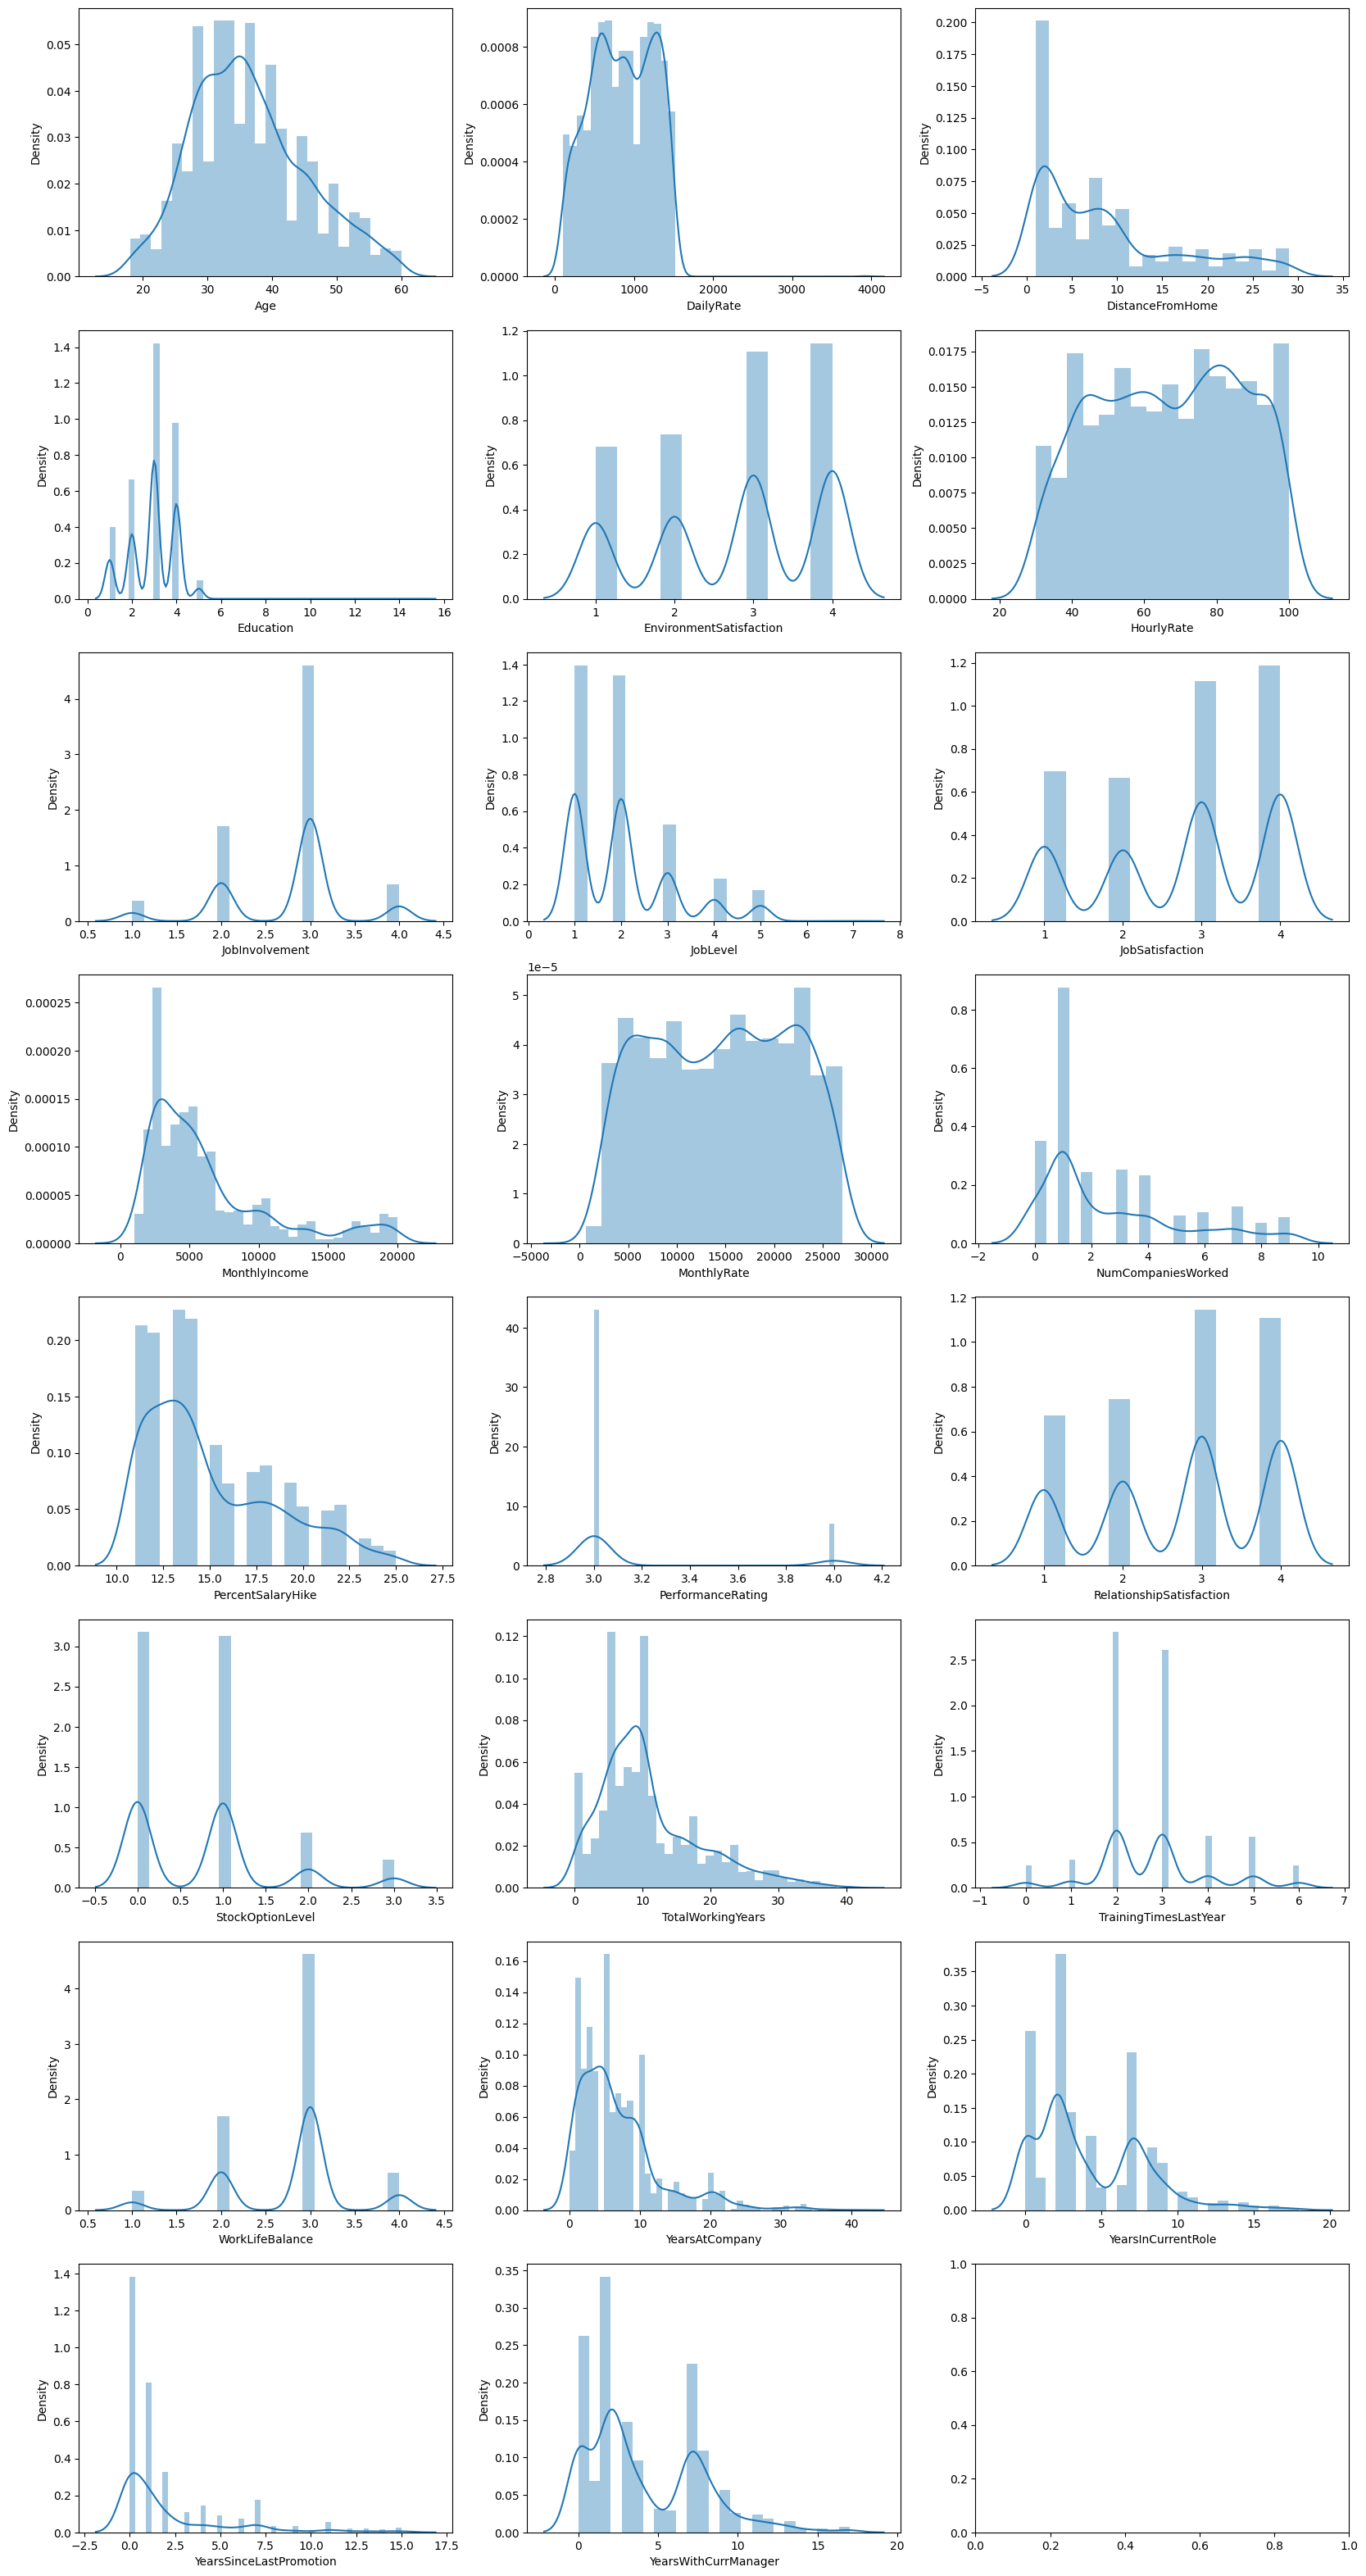

In [8]:
# Create an 8,3 grid of subplots
fig, ax = plt.subplots(8,3, figsize=(20,40))

# Loop through the columns and plot a histogram for each
for column in quantitative:
    sns.distplot(train[column], ax=ax[quantitative.index(column)//3][quantitative.index(column)%3])

In [9]:
counts_df = pd.concat([
    pd.DataFrame(train.nunique(), columns=['train']),
    pd.DataFrame(test.nunique(), columns=['test']),
], axis=1)
counts_df['top10values-train'] = counts_df.index.map(lambda d: train[d].value_counts().index[:10].tolist())
counts_df['top10values-test'] = counts_df.index.map(lambda d: test[d].value_counts().index[:10].tolist())
counts_df['count-difference'] = counts_df['train'] != counts_df['test']
counts_df.sort_values('train')

,train,test,top10values-train,top10values-test,count-difference
PerformanceRating,2,2,"[3, 4]","[3, 4]",False
OverTime,2,2,"[No, Yes]","[No, Yes]",False
Gender,2,2,"[Male, Female]","[Male, Female]",False
MaritalStatus,3,3,"[Married, Single, Divorced]","[Married, Single, Divorced]",False
BusinessTravel,3,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]","[Travel_Rarely, Travel_Frequently, Non-Travel]",False
Department,3,3,"[Research & Development, Sales, Human Resources]","[Research & Development, Sales, Human Resources]",False
RelationshipSatisfaction,4,4,"[3, 4, 2, 1]","[3, 4, 2, 1]",False
JobSatisfaction,4,4,"[4, 3, 1, 2]","[4, 3, 2, 1]",False
JobInvolvement,4,5,"[3, 2, 4, 1]","[3, 2, 4, 1, 0]",True
StockOptionLevel,4,5,"[0, 1, 2, 3]","[0, 1, 2, 3, 4]",True


In [10]:
NUM_FEATURES = counts_df[counts_df['train'] >= 10].index.tolist()
NUM_FEATURES

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
CAT_FEATURES = sorted(set(counts_df.index).difference(NUM_FEATURES))
CAT_FEATURES

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [12]:
set(train.columns) - set(test.columns)

set()

In [13]:
set(test.columns) - set(train.columns)

set()

In [14]:
# Encode the qualitative columns using get_dummies
scaler = StandardScaler()

train[NUM_FEATURES] = scaler.fit_transform(train[NUM_FEATURES])
train = pd.get_dummies(train)

test[NUM_FEATURES] = scaler.fit_transform(test[NUM_FEATURES])
test = pd.get_dummies(test)

pd.concat([
    pd.DataFrame(train.isnull().sum(), columns=['train']),
    pd.DataFrame(test.isnull().sum(), columns=['test'])])

,train,test
Age,0.0,NaN
DailyRate,0.0,NaN
DistanceFromHome,0.0,NaN
Education,0.0,NaN
EnvironmentSatisfaction,0.0,NaN
...,...,...
MaritalStatus_Divorced,NaN,0.0
MaritalStatus_Married,NaN,0.0
MaritalStatus_Single,NaN,0.0
OverTime_No,NaN,0.0


In [15]:
train.shape

(3147, 51)

In [16]:
test.shape

(1119, 51)

In [17]:
# Split the train data into train and test
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# ROC Function
def plot_roc_curve(grid, X_test, y_test):
    y_pred = grid.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

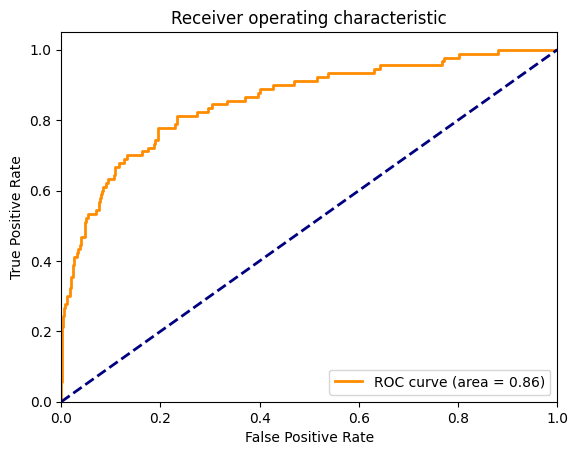

In [23]:
# create a multilayer perceptron model

mlp = MLPClassifier(random_state=42)

# create a pipeline of standard scaler and multilayer perceptron

pipe = make_pipeline(StandardScaler(), mlp)

# create a dictionary of all values we want to test for n_neighbors


param_grid = {'mlpclassifier__hidden_layer_sizes': [(100,100,100), (100,100), (100,)],

                'mlpclassifier__activation': ['tanh', 'relu'],
                                              
                'mlpclassifier__solver': ['sgd', 'adam'],
                                          
                'mlpclassifier__alpha': [0.0001, 0.05],
                                         
                'mlpclassifier__learning_rate': ['constant','adaptive'],
                                                 
                'mlpclassifier__max_iter': [100, 500, 1000]}

# use gridsearch to test all values for n_neighbors

mlp_gs = GridSearchCV(pipe, param_grid, cv=kfolds, scoring='roc_auc', n_jobs=-1)

# fit model to training data

mlp_gs.fit(X_train, y_train)

# check top performing n_neighbors value

mlp_gs.best_params_

# check mean score for the top performing value of n_neighbors

mlp_gs.best_score_

# check best estimator

mlp_gs.best_estimator_

# plt the ROC curve

plot_roc_curve(mlp_gs, X_test, y_test)

Best parameters: {'nb__var_smoothing': 0.1}
Best cross-validation score: 0.78


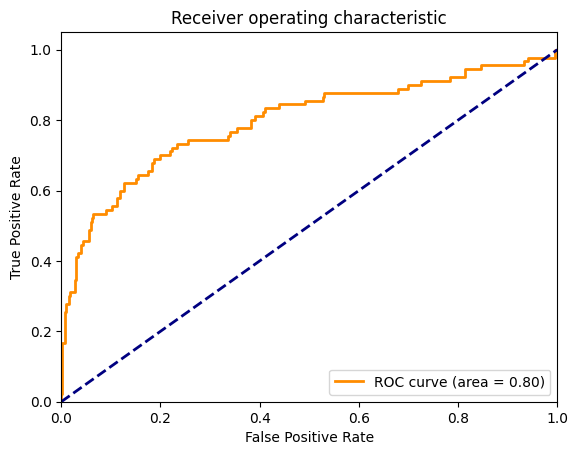

In [21]:
# create a naive bayes classifier

from sklearn.naive_bayes import GaussianNB

# create a pipeline

pipe = Pipeline([('nb', GaussianNB())])

# create a parameter grid

param_grid = {'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}

# create a grid search object

grid = GridSearchCV(pipe, param_grid, cv=kfolds, scoring='roc_auc', n_jobs=-1)

# fit the grid search

grid.fit(X_train, y_train)

# print the best parameters and best AUC score

print("Best parameters: {}".format(grid.best_params_))

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

# plot the ROC curve

plot_roc_curve(grid, X_test, y_test)



Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
0.881998988174287


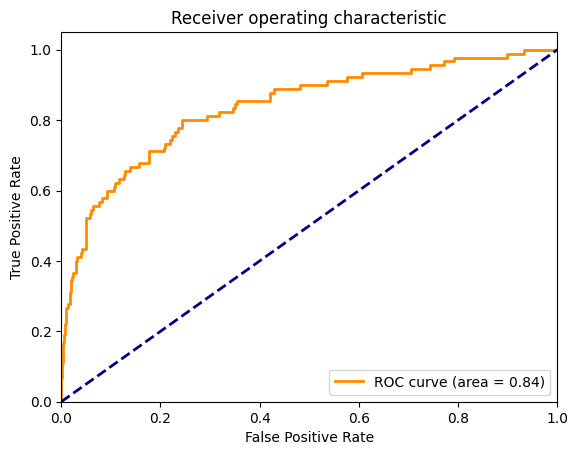

In [22]:
# Generate a larger parameter grid


pipe = LogisticRegression()

param_grid = {
              'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'class_weight': ['balanced', None],
              'solver': ['liblinear','saga']}

grid_l = GridSearchCV(pipe, param_grid = param_grid, cv = kfolds, verbose=True, n_jobs=-1)

grid_l.fit(X_train, y_train)
print(grid_l.best_params_)
print(grid_l.best_score_)

plot_roc_curve(grid_l, X_test, y_test)


In [29]:
#import random serach
from sklearn.model_selection import RandomizedSearchCV

{'nb__var_smoothing': 0.1}
0.7804608294930875


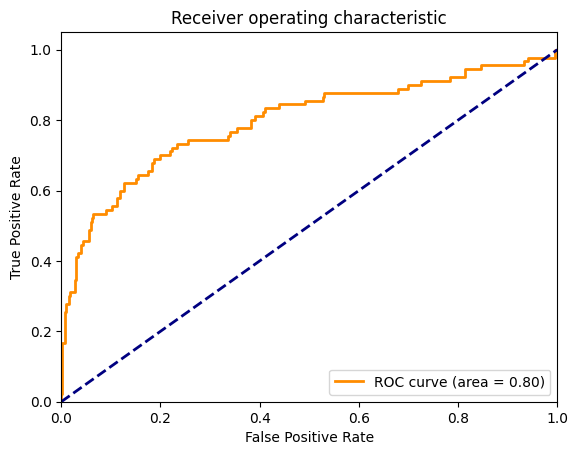

In [30]:
# Train A Gradient Boosting Model w/ GridSearchCV and RobustScaler pipeline
pipe = GradientBoostingClassifier()

param_grid = {
              'n_estimators': [100, 200, 300, 400],
              'max_depth': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': ['auto', 'sqrt', 'log2'],
              'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'loss': ['deviance', 'exponential']
}

grid_gb = RandomizedSearchCV(pipe, param_distributions = param_grid, cv = kfolds, n_iter = 50)

grid_gb.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

plot_roc_curve(grid, X_test, y_test)


{'subsample': 0.9, 'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 2, 'loss': 'exponential', 'learning_rate': 0.3}
0.8907481186365649


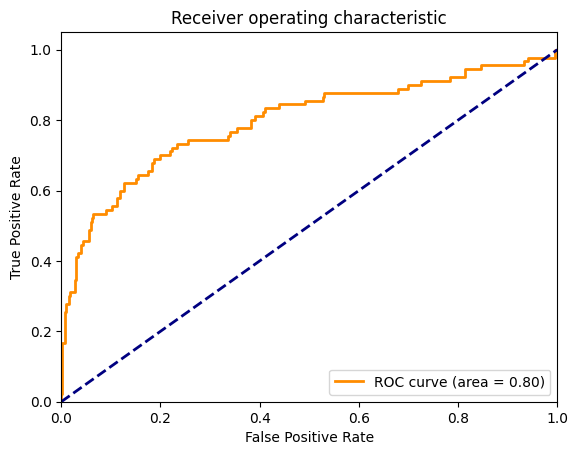

In [31]:
# Train A XGBoost Tree Model w/ GridSearchCV

xgb = XGBClassifier()

param_grid = {
              'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': ['auto', 'sqrt', 'log2'],
              'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']}

grid_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, cv = kfolds, n_iter= 100)

grid_xgb.fit(X_train, y_train)
print(grid_xgb.best_params_)
print(grid_xgb.best_score_)

plot_roc_curve(grid, X_test, y_test)


In [32]:
# Blending the models
def blend_models_predict(X):
    return ((grid.predict_proba(X)[:,1]) + (grid_xgb.predict_proba(X)[:,1]) + (grid_gb.predict_proba(X)[:,1]) + (grid_l.predict_proba(X)[:,1]) + (mlp_gs.predict_proba(X)[:,1])) / 5

In [27]:
sample_submission = pd.read_csv('sample_submission.csv')

sample_submission['Attrition'] = blend_models_predict(test)

sample_submission.to_csv('submission.csv', index=False)

In [33]:
sample_submission.shape

(1119, 2)

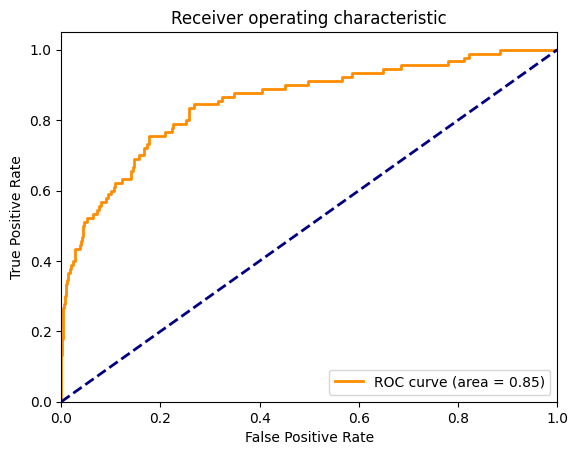

In [34]:
y_pred = blend_models_predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
# Blend the predictions of the 3 submissions
sample_submissions = []
for i in range(1,4):
    sample_submission = pd.read_csv('submission{}.csv'.format(i))
    sample_submissions.append(sample_submission)

sample_submission = pd.DataFrame((sample_submissions[0]['Attrition'] + sample_submissions[1]['Attrition'] + sample_submissions[2]['Attrition'])/3, columns=['Attrition']) 

In [46]:
sample_submission['id'] = sample_submissions[0]['id']

In [47]:
sample_submission.columns

Index(['Attrition', 'id'], dtype='object')

In [49]:
sample_submission[['id', 'Attrition']].to_csv('submission.csv', index=False)

In [48]:
sample_submission.to_csv('submission.csv', index=False)